In [5]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [9]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[' Label']= encoder.fit_transform(df[' Label'])

In [15]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [17]:
df[' Label'].value_counts().sum

<bound method Series.sum of  Label
1    128027
0     97718
Name: count, dtype: int64>

In [19]:
df = df.fillna(0)  # Replace NaN with 0
df = df.replace([np.inf, -np.inf], 0)

In [21]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [41]:
df=df.astype(int)

In [61]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(' Label',axis=1)
y = df[' Label']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
from sklearn.impute import SimpleImputer
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(10, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [65]:
# Get the boolean mask of selected features
selected_features_mask = k_best.get_support()

In [67]:
elected_feature_names = X.columns[selected_features_mask]
elected_feature_names

Index([' Destination Port', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Min Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' URG Flag Count', ' Average Packet Size',
       ' Avg Bwd Segment Size'],
      dtype='object')

In [69]:
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']
df_new=X[new_columns]
df_new

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward
0,54865,0,0,0,6,0,0,6,0,20
1,55054,6,6,9174,6,0,1,6,6,20
2,55055,6,6,19230,6,0,1,6,6,20
3,46236,6,6,29411,6,0,1,6,6,20
4,54863,0,0,0,6,0,0,6,0,20
...,...,...,...,...,...,...,...,...,...,...
225740,61374,6,6,16393,6,0,1,6,6,20
225741,61378,6,6,13888,6,0,1,6,6,20
225742,61375,6,6,13333,6,0,1,6,6,20
225743,61323,0,0,0,6,0,0,6,0,20


In [71]:
df_new['label']=df[' Label']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4456\3066840877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df[' Label']


In [73]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values
X1

array([[54865,     0,     0, ...,     6,     0,    20],
       [55054,     6,     6, ...,     6,     6,    20],
       [55055,     6,     6, ...,     6,     6,    20],
       ...,
       [61375,     6,     6, ...,     6,     6,    20],
       [61323,     0,     0, ...,     6,     0,    20],
       [61326,     6,     6, ...,     6,     6,    20]])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer ='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#training the ann on training set
ann.fit(X_train,y_train,batch_size=32,epochs=10,callbacks=[early_stopping])

Epoch 1/10


C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 541us/step - accuracy: 0.4354 - loss: 0.0000e+00
Epoch 2/10
 282/4939 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - accuracy: 0.4367 - loss: 0.0000e+00

C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step - accuracy: 0.4321 - loss: 0.0000e+00
Epoch 3/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 524us/step - accuracy: 0.4322 - loss: 0.0000e+00
Epoch 4/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 504us/step - accuracy: 0.4328 - loss: 0.0000e+00
Epoch 5/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 2s 497us/step - accuracy: 0.4341 - loss: 0.0000e+00
Epoch 6/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 511us/step - accuracy: 0.4343 - loss: 0.0000e+00
Epoch 7/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 516us/step - accuracy: 0.4328 - loss: 0.0000e+00
Epoch 8/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step - accuracy: 0.4324 - loss: 0.0000e+00
Epoch 9/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 520us/step - accuracy: 0.4321 - loss: 0.0000e+00
Epoch 10/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step - accuracy: 0.4339 - loss: 0.0000e+00


In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=42)

In [83]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (158021, 11)
X_test shape: (67724, 11)
y_train shape: (158021,)
y_test shape: (67724,)


In [85]:
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred = lr.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:",  mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1.6051850882661848e-27
R-squared: 1.0


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
df = pd.read_csv('./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# 去除列名中的前后空格
df.columns = df.columns.str.strip()

# 检查数据概况
print("数据集信息:")
print(df.info())

# 显示数据的前几行，便于了解数据内容
print("数据预览:")
print(df.head())

# 检查是否有缺失值
print("每列的缺失值统计:")
print(df.isnull().sum())

# 处理缺失值（如果有缺失值，我们用均值填充数值型特征）
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# 检查数据中的无穷大和非常大的值
print("检查无穷大和非常大的值:")
for col in numeric_features:
    if np.isinf(df[col]).any():
        print(f"列 '{col}' 包含无穷大值。")
    if (df[col] > np.finfo(np.float64).max).any():
        print(f"列 '{col}' 包含超出 float64 范围的值。")

# 将无穷大和非常大的值替换为列的均值
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# 提取特征和标签
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  # 假设 'Label' 列是目标变量
    y = df['Label'].values
else:
    raise ValueError("数据集中未找到 'Label' 列，请检查列名或数据结构。")

# 将分类标签转换为数值编码（假设 'Label' 是分类变量）
le = LabelEncoder()
y = le.fit_transform(y)

# 数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float

In [17]:
# 提取特征和标签
if 'Label' in df.columns:
    X = df.drop('Label', axis=1).values  # 假设 'Label' 列是目标变量
    y = df['Label'].values
else:
    raise ValueError("数据集中未找到 'Label' 列，请检查列名或数据结构。")

# 将分类标签转换为数值编码（假设 'Label' 是分类变量）
le = LabelEncoder()
y = le.fit_transform(y)


In [19]:
# 数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# 构建ANN模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 假设是二分类问题

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\ProgramData\anaconda3\envs\myEnv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4515/4515 ━━━━━━━━━━━━━━━━━━━━ 4s 735us/step - accuracy: 0.9646 - loss: 0.0944 - val_accuracy: 0.9990 - val_loss: 0.0056
Epoch 2/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - accuracy: 0.9980 - loss: 0.0101 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 3/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 722us/step - accuracy: 0.9986 - loss: 0.0076 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 4/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 720us/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 5/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 709us/step - accuracy: 0.9990 - loss: 0.0060 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 6/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 708us/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 7/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 717us/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 8/50
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 3s 705us/step - accuracy: 0.9990 - loss: 0.00

In [23]:
# 模型评估
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 打印分类报告和混淆矩阵
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

[[19398     7]
 [    9 25735]]


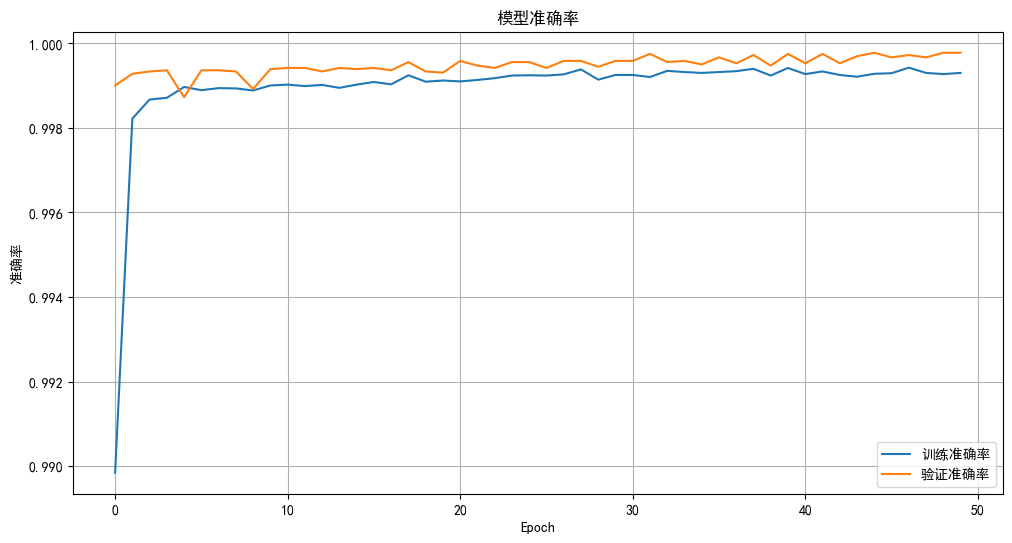

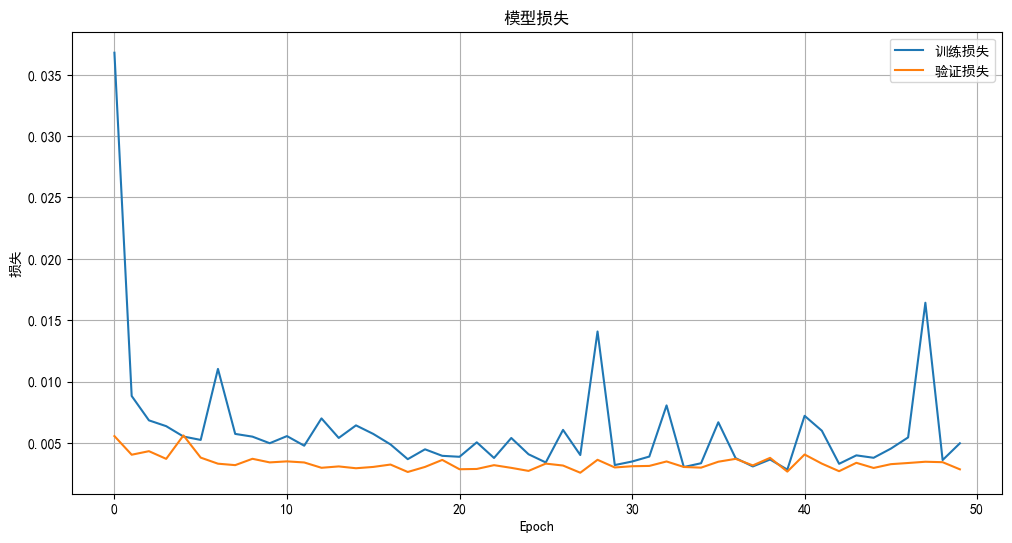

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体），以便正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制训练和验证的准确率变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
plt.show()

# 绘制训练和验证的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
plt.show()


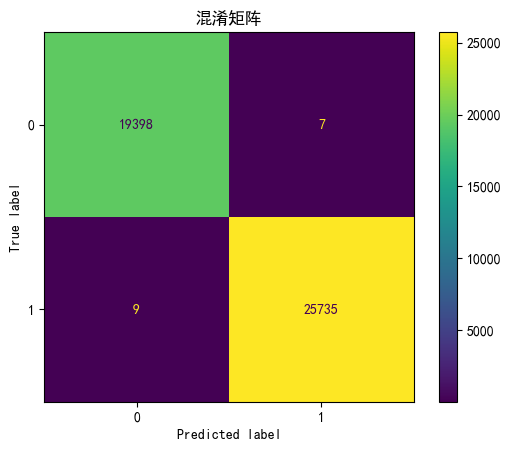

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# 绘制混淆矩阵
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('混淆矩阵')
plt.show()
